### Goal
A bank is investigating a very high rate of customers leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

### Customer Churn Prediction Using ANN

In [454]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL Assignment/Churn_Modelling.csv")

In [455]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EDA & Preprocessing**

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [457]:
# checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [458]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


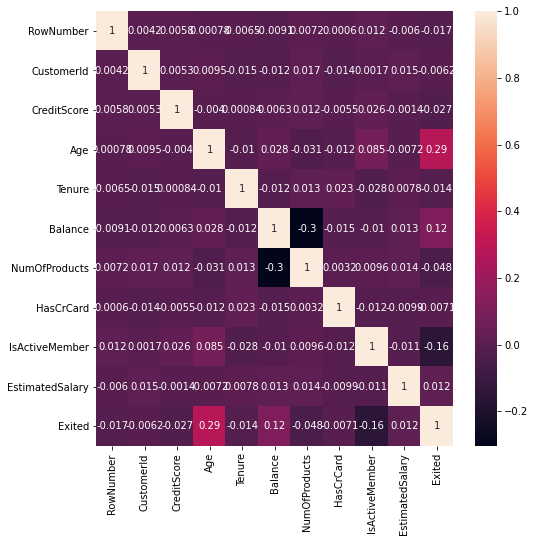

In [459]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

**We can say that there is no multicolinearity present in data.**

 dropping useless columns 

In [460]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1,inplace=True)

In [461]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [462]:
# Numerical columns

In [463]:
df_num = df.select_dtypes(exclude=object)

In [464]:
# categorical columns

In [465]:
df_cat = df.select_dtypes(include=object)

In [466]:
# visualizing continuous variables

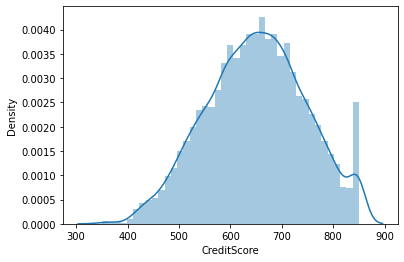

-0.07159586676212397


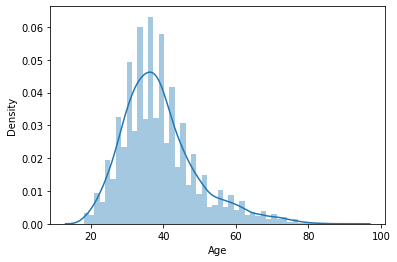

1.0111685586628079


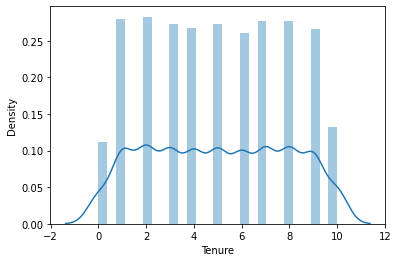

0.010989809189781041


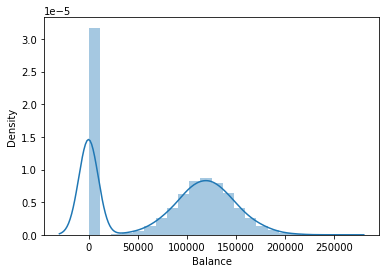

-0.14108754375291138


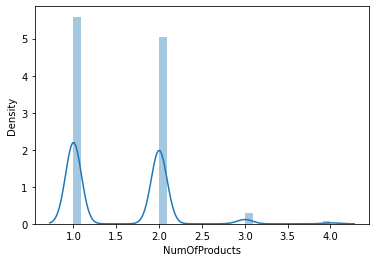

0.745456048438949


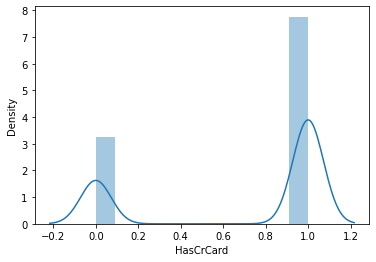

-0.9016763178640548


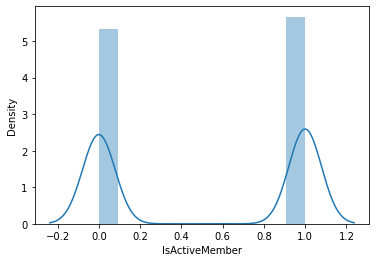

-0.06042756246298516


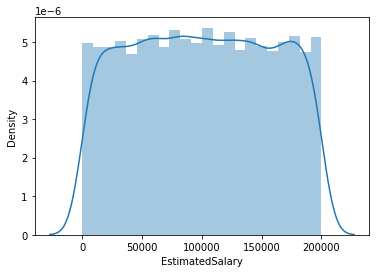

0.0020850448448748848


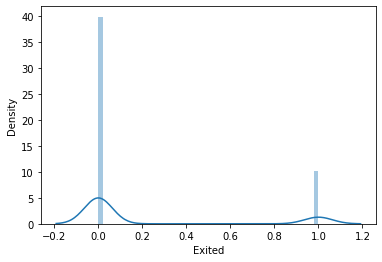

1.4713899141398699


In [467]:
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(skew(df_num[col]))

In [468]:
for col in df_num:
  if skew(df_num[col])>0.5 or skew(df_num[col])<-0.5:
    df_num[col] = np.sqrt(df_num[col])

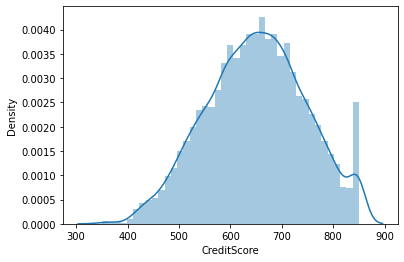

-0.07159586676212397


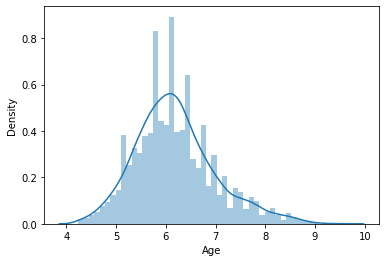

0.5933159623197802


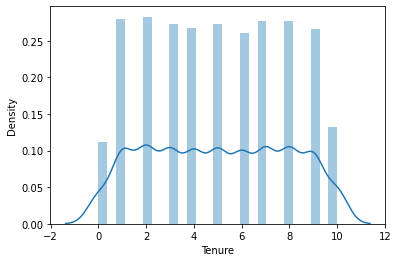

0.010989809189781041


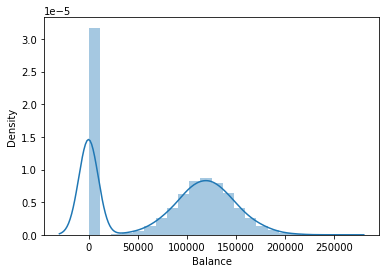

-0.14108754375291138


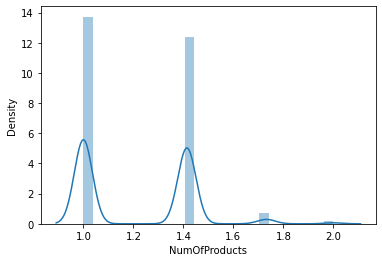

0.4204651463627845


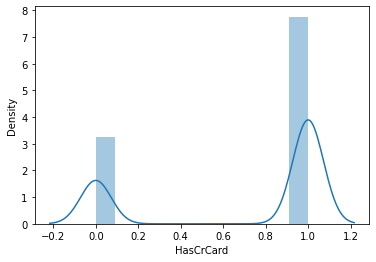

-0.9016763178640548


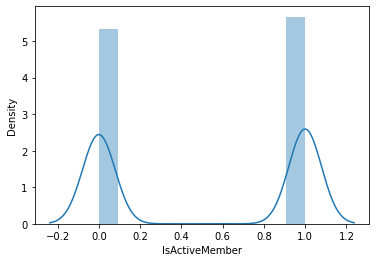

-0.06042756246298516


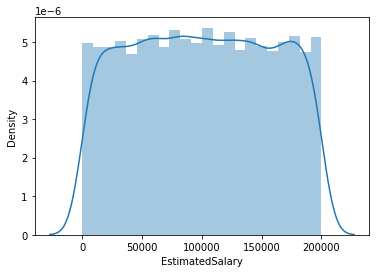

0.0020850448448748848


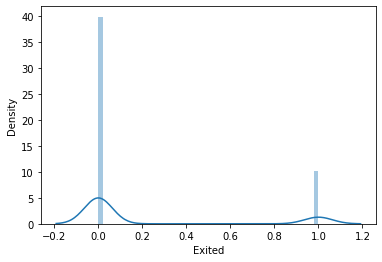

1.4713899141398699


In [469]:
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(skew(df_num[col]))

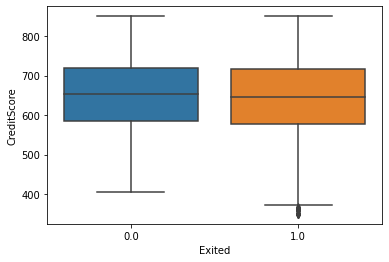

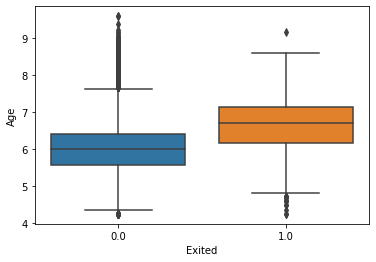

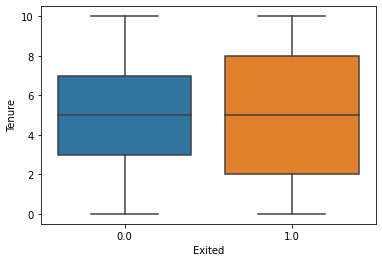

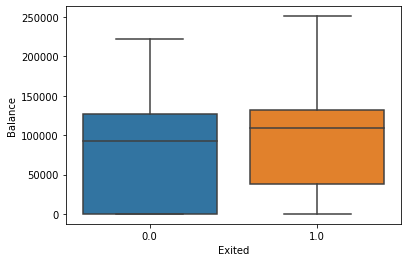

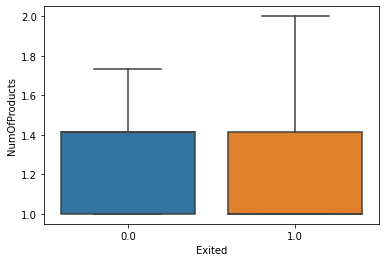

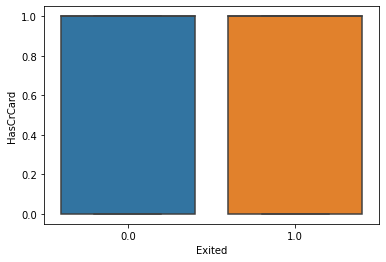

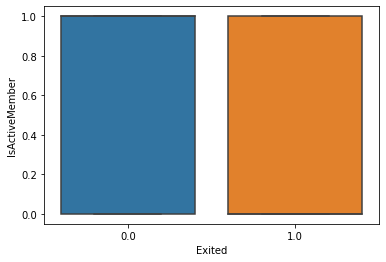

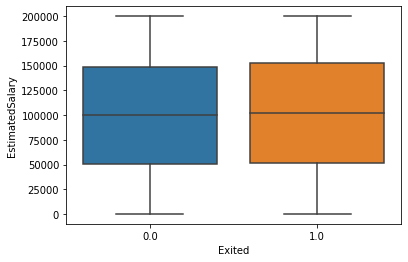

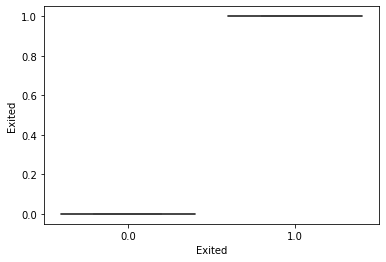

In [470]:
for col in df_num:
  plt.figure()
  sns.boxplot(x='Exited',y = df_num[col],data=df_num)
  plt.show()

**From above we can conclude that:-**

     1>There is no significant difference in credit score distribution between  customers which are churned or not.

     2>.The older customers are churning more than younger ones.

     3>Majority of customers have tenure between 1 to 9 .

     4>Bank is loosing customers with significant bank balance.

     5>Most of the customers have 1 or 2 products.

     6>Majority of customers have credit cards.

     7> The inactive members have a greater churn & also proportion of inactive members is also very high.

     8>Estimated Salary does not have a significant on the possibility to churn.
 





In [471]:
# visualizing categorical variables

In [472]:
df_cat.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


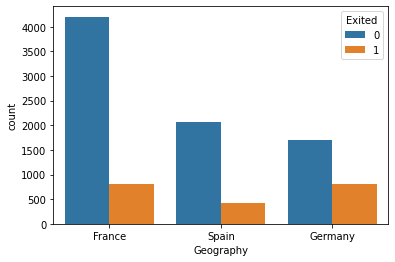

In [473]:
plt.figure()
sns.countplot('Geography', hue = 'Exited', data = df)
plt.show()

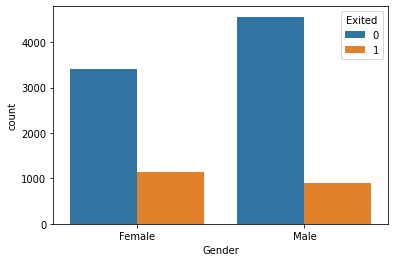

In [474]:
plt.figure()
sns.countplot('Gender', hue = 'Exited', data = df)
plt.show()

**From above we can conclude that:-**

      1>Majority of the customers are from france but most customers which churned are from germany

      2>The proportion of female customers churning is also greater than that of male customers.

**Encoding categorical variables**

In [475]:
le = LabelEncoder()
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

In [476]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [477]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,6.480741,2,0.00,1.000000,1.0,1,101348.88,1.0,0,0
1,608,6.403124,1,83807.86,1.000000,0.0,1,112542.58,0.0,2,0
2,502,6.480741,8,159660.80,1.732051,1.0,0,113931.57,1.0,0,0
3,699,6.244998,1,0.00,1.414214,0.0,0,93826.63,0.0,0,0
4,850,6.557439,2,125510.82,1.000000,1.0,1,79084.10,0.0,2,0


In [478]:
# creating features and label 

In [479]:
X = df_new.drop("Exited",axis=1)

In [480]:
y = df["Exited"]

In [481]:
# splitting data into training set and test set

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

In [483]:
# Scaling data

In [484]:
sc = StandardScaler()
X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

### Baseline model

In [527]:
# initializing ann
base_model = Sequential()

In [528]:
# adding the first input layer and the first hidden layer
base_model.add(Dense(8,input_shape=(X.shape[1],),activation = 'relu'))

In [529]:
# adding the second hidden layer
base_model.add(Dense(8,activation='relu'))


In [530]:
# adding third hidden layer
base_model.add(Dense(4,activation='relu'))

In [531]:
# adding the output layer
base_model.add(Dense(1,activation = 'sigmoid'))

In [532]:
## model summary
base_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_77 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_78 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [533]:
base_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [534]:
base_model_history = base_model.fit(X_train_ss,y_train,batch_size = 10, epochs = 100,validation_data=(X_train_ss,y_train))

Epoch 1/100
700/700 [==============================] - 2s 2ms/step - loss: 0.5280 - val_loss: 0.4518
Epoch 2/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4496 - val_loss: 0.4314
Epoch 3/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4352 - val_loss: 0.4201
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4227 - val_loss: 0.4116
Epoch 5/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4180 - val_loss: 0.4035
Epoch 6/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.3938
Epoch 7/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3863 - val_loss: 0.3840
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3713 - val_loss: 0.3757
Epoch 9/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3754 - val_loss: 0.3693
Epoch 10/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3717 - val_lo

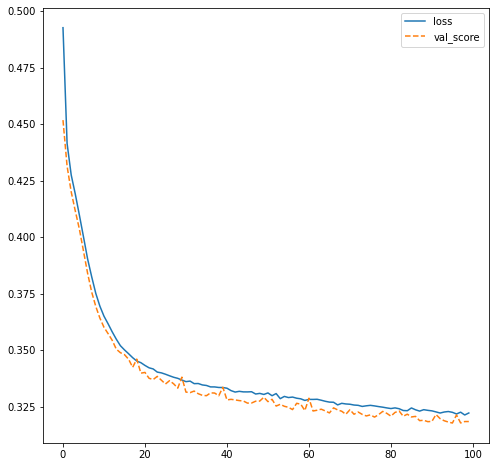

In [535]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(base_model_history.history['loss'], label='loss')
plt.plot(base_model_history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [536]:
y_pred_base = base_model.predict(X_test_ss)

In [537]:
y_pred_base = np.where(y_pred_base>0.5,1,0)

In [538]:
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.81      0.46      0.59       627

    accuracy                           0.86      3000
   macro avg       0.84      0.72      0.75      3000
weighted avg       0.86      0.86      0.85      3000



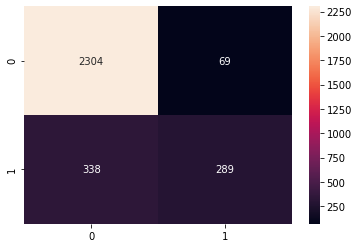

In [539]:
mat = confusion_matrix(y_test,y_pred_base)
sns.heatmap(mat,annot=True,fmt='d')

Accuracy of model is 86%

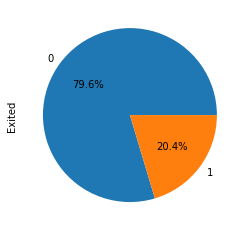

In [485]:
y.value_counts().plot.pie(autopct="%.1f%%")

We can see that there is imbalanced data

**Handeling imbalanced data**

Oversampling

In [486]:
from imblearn.over_sampling import RandomOverSampler

In [487]:
ros = RandomOverSampler(random_state=1)

In [488]:
X_sample_1,y_sample_1 = ros.fit_resample(X_train_ss,y_train)

In [489]:
pd.Series(y_sample_1).value_counts()

1    5590
0    5590
dtype: int64

Undersampling

In [490]:
from imblearn.under_sampling import RandomUnderSampler

In [491]:
rus = RandomUnderSampler(random_state=1)

In [492]:
X_sample_2,y_sample_2 = rus.fit_resample(X_train_ss,y_train)

In [493]:
pd.Series(y_sample_2).value_counts()

1    1410
0    1410
dtype: int64

### Building ANN

ANN with Oversampling

In [495]:
# initializing ann
model = Sequential()

In [496]:
# adding the first input layer and the first hidden layer
model.add(Dense(8,input_shape=(X.shape[1],),activation = 'relu'))


In [497]:
# adding the second hidden layer
model.add(Dense(8,activation='relu'))


In [498]:
# adding third hidden layer
model.add(Dense(4,activation='relu'))


In [499]:
# adding the output layer
model.add(Dense(1,activation = 'sigmoid'))

In [500]:
## model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_69 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [501]:
# compiling the model

In [502]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [503]:
# fitting the ANN to the training set 

In [504]:
model_history = model.fit(X_sample_1,y_sample_1, batch_size = 10, epochs = 100,validation_data=(X_sample_1,y_sample_1))

Epoch 1/100
1118/1118 [==============================] - 3s 2ms/step - loss: 0.6724 - val_loss: 0.5871
Epoch 2/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.5809 - val_loss: 0.5632
Epoch 3/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.5632 - val_loss: 0.5337
Epoch 4/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.5371 - val_loss: 0.5023
Epoch 5/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.5063 - val_loss: 0.4891
Epoch 6/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4946 - val_loss: 0.4834
Epoch 7/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4899 - val_loss: 0.4786
Epoch 8/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4867 - val_loss: 0.4765
Epoch 9/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4796 - val_loss: 0.4722
Epoch 10/100
1118/1118 [==============================] - 2s 2ms/step - l

**Visualizing Training and Validation Loss**

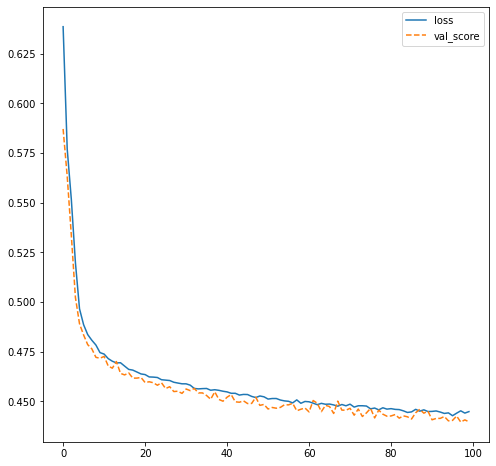

In [505]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [506]:
y_pred = model.predict(X_test_ss)

In [507]:
y_pred = np.where(y_pred>0.5,1,0)

In [508]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2373
           1       0.49      0.73      0.58       627

    accuracy                           0.78      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.78      0.80      3000



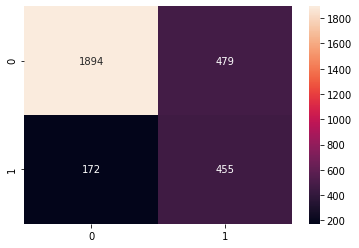

In [509]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,annot=True,fmt='d')

ANN with undersampling

In [510]:
# initializing ann
model1 = Sequential()

In [511]:
# adding the first input layer and the first hidden layer
model1.add(Dense(8,input_shape=(X.shape[1],),activation = 'relu'))

In [512]:
# adding the second hidden layer
model1.add(Dense(8,activation='relu'))

In [513]:
# adding third hidden layer
model1.add(Dense(4,activation='relu'))

In [514]:
# adding the output layer
model1.add(Dense(1,activation = 'sigmoid'))

In [515]:
## model summary
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_73 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_74 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [516]:
## compiling model

In [517]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [518]:
# fitting the ANN to the training set 

In [519]:
model1_history = model1.fit(X_sample_2,y_sample_2, batch_size = 10, epochs = 100,validation_data=(X_sample_2,y_sample_2))

Epoch 1/100
282/282 [==============================] - 1s 3ms/step - loss: 0.6729 - val_loss: 0.6478
Epoch 2/100
282/282 [==============================] - 1s 2ms/step - loss: 0.6402 - val_loss: 0.6212
Epoch 3/100
282/282 [==============================] - 1s 2ms/step - loss: 0.6105 - val_loss: 0.5985
Epoch 4/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5896 - val_loss: 0.5855
Epoch 5/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5760 - val_loss: 0.5766
Epoch 6/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5696 - val_loss: 0.5678
Epoch 7/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5608 - val_loss: 0.5596
Epoch 8/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5617 - val_loss: 0.5521
Epoch 9/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5645 - val_loss: 0.5443
Epoch 10/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5296 - val_lo

**Visualizing Training and Validation Loss**

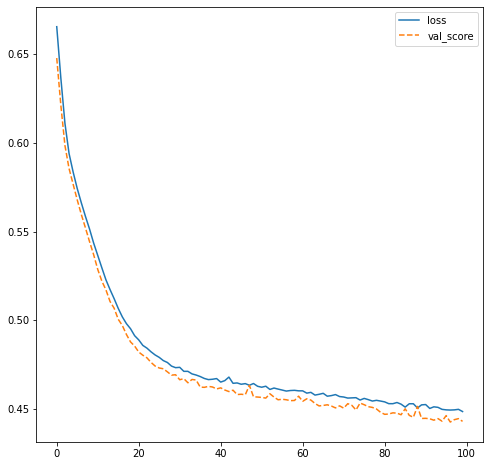

In [520]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(model1_history.history['loss'], label='loss')
plt.plot(model1_history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [521]:
y_pred1 = model1.predict(X_test_ss)

In [522]:
y_pred1 = np.where(y_pred1>0.5,1,0)

In [523]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      2373
           1       0.44      0.79      0.57       627

    accuracy                           0.75      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.83      0.75      0.77      3000



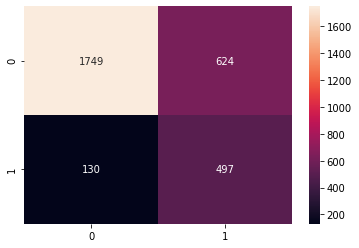

In [524]:
mat1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(mat1,annot=True,fmt='d')

### Results And Conclusion

The datasets is Visualized based on different criterion. The prediction of CostumerChurn is performed using **ANN(Undersampling&Oversampling)&Baseline model for oversampling we get accuracy of 78% and using undersampling with accuracy of 75%.But with Baseline model we get Accuracy of 86%**